In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
df1 = pd.read_csv('기온강수량미세먼지2.csv', encoding = 'cp949')
df2= pd.read_csv('일별따릉이.csv')
기상청_분석 = pd.merge(df1, df2, on='기준_날짜', how='inner')


In [4]:
# 최고기온을 5도 단위로 구간을 나누기 위한 함수 정의
def temperature_range(temperature):
    return int(temperature // 5) * 5

# 최고기온을 5도 단위로 구간을 나누고 '구간' 열에 할당
기상청_분석['구간'] = 기상청_분석['평균기온(°C)'].apply(temperature_range)

# 각 구간별 전체_건수의 평균 계산
avg_counts_by_temperature_range = 기상청_분석.groupby('구간')['전체_건수'].mean()

print(avg_counts_by_temperature_range)


구간
-15     6297.000000
-10     5180.285714
-5      5742.772727
 0      5621.766667
 5     10676.272727
 10     7954.750000
 15    12327.563636
 20    13280.171429
 25    12327.193548
 30    13196.500000
Name: 전체_건수, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


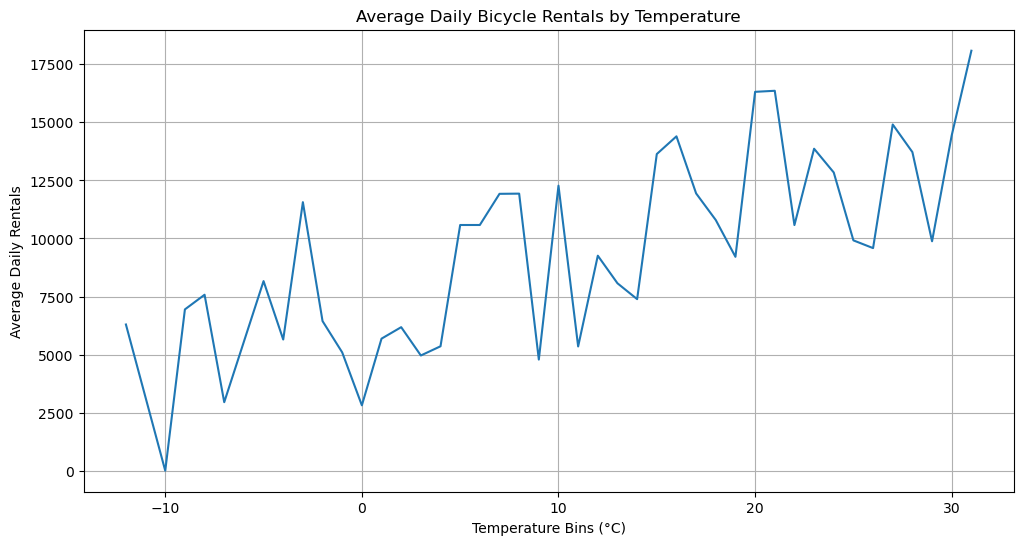

대여량이 급격히 줄어드는 기온 임계값은 10.0도 입니다.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
temperature_data = pd.read_csv('./기온강수량미세먼지2.csv', encoding='cp949')  # 일평균기온 데이터 파일
bicycle_data = pd.read_csv('./일별따릉이.csv')  # 일 따릉이 대여량 데이터 파일

# 날짜 기준으로 데이터 병합 (날짜 형식이 일치해야 함)
merged_data = pd.merge(temperature_data, bicycle_data, on='기준_날짜')

# 기온에 따른 대여량의 시각화를 위한 데이터 정리
# 기온을 정수형으로 반올림하여 각 기온별 평균 대여량 계산
merged_data['rounded_temp'] = merged_data['평균기온(°C)'].round()  # 기온을 반올림
average_rentals_by_temp = merged_data.groupby('rounded_temp')['전체_건수'].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_rentals_by_temp.index, y=average_rentals_by_temp.values)
plt.title('Average Daily Bicycle Rentals by Temperature')
plt.xlabel('Temperature Bins (°C)')
plt.ylabel('Average Daily Rentals')
plt.grid(True)
plt.show()

# 대여량이 급격하게 줄어드는 기온 찾기
# 예를 들어, 기온 변화에 따른 대여량의 변화율을 계산하여 급격한 변화가 있는 지점 찾기
change_rates = average_rentals_by_temp.diff().abs()  # 변화율 계산
threshold_temp = change_rates.idxmax()  # 가장 큰 변화가 있는 기온

print(f"대여량이 급격히 줄어드는 기온 임계값은 {threshold_temp}도 입니다.")


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
weather_data = pd.read_csv('기온강수량미세먼지2.csv', encoding='cp949')  # 날씨 데이터 파일, 인코딩 확인
rental_data = pd.read_csv('일별따릉이.csv', encoding='utf-8')  # 대여량 데이터 파일, 인코딩 확인

# 날짜 형식 통일
weather_data['기준_날짜'] = pd.to_datetime(weather_data['기준_날짜'])
rental_data['기준_날짜'] = pd.to_datetime(rental_data['기준_날짜'])

merged_data = pd.merge(weather_data, rental_data, on='기준_날짜', how='inner')


C:\Users\evol0\AppData\Local\Temp\ipykernel_28196\2733982779.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_data.groupby(['Temperature Category', 'Precipitation Category', 'PM Category']).agg({'전체_건수': 'mean'}).reset_index()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


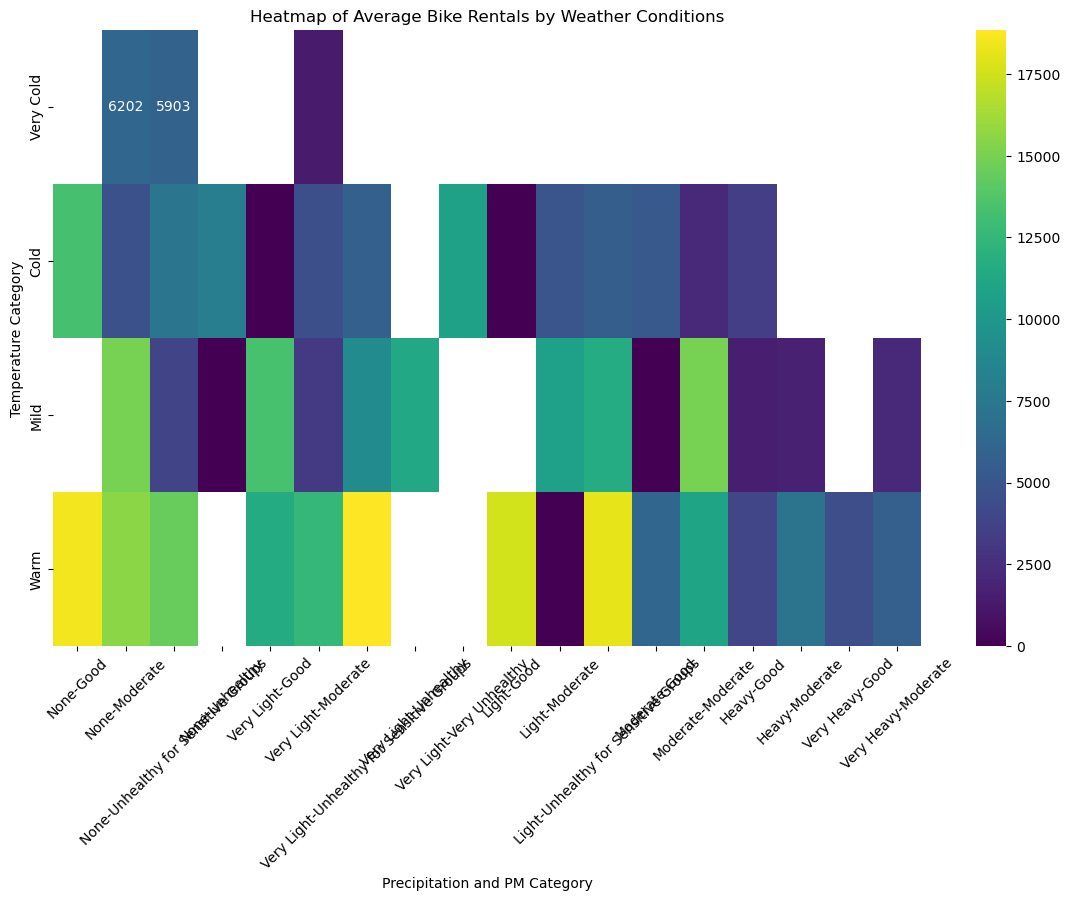

In [10]:
# 변수 별 범주화
temperature_bins = [-10, 0, 10, 20, 30, 40]  # 기온 범위
temperature_labels = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']  # 5개 레이블

precipitation_bins = [0, 1, 5, 10, 20, 50, 100]  # 강수량 범위
precipitation_labels = ['None', 'Very Light', 'Light', 'Moderate', 'Heavy', 'Very Heavy']  # 6개 레이블

pm_bins = [0, 15, 35, 75, 150, 300]  # 미세먼지 범위
pm_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']  # 5개 레이블

merged_data['Temperature Category'] = pd.cut(merged_data['평균기온(°C)'], bins=temperature_bins, labels=temperature_labels)
merged_data['Precipitation Category'] = pd.cut(merged_data['일강수량(mm)'], bins=precipitation_bins, labels=precipitation_labels)
merged_data['PM Category'] = pd.cut(merged_data['미세먼지'], bins=pm_bins, labels=pm_labels)

# 히트맵 데이터 준비
grouped_data = merged_data.groupby(['Temperature Category', 'Precipitation Category', 'PM Category']).agg({'전체_건수': 'mean'}).reset_index()

# 피벗 테이블 생성
pivot_table = grouped_data.pivot_table(index='Temperature Category', columns=['Precipitation Category', 'PM Category'], values='전체_건수')

# 히트맵 그리기
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis")
plt.title('Heatmap of Average Bike Rentals by Weather Conditions')
plt.ylabel('Temperature Category')
plt.xlabel('Precipitation and PM Category')
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
weather_data = pd.read_csv('./기온강수량미세먼지2.csv', encoding='cp949')  # 날씨 데이터 파일
rental_data = pd.read_csv('일별따릉이.csv', encoding='utf-8')  # 대여량 데이터 파일

# 날짜 형식 통일
weather_data['기준_날짜'] = pd.to_datetime(weather_data['기준_날짜'])
rental_data['기준_날짜'] = pd.to_datetime(rental_data['기준_날짜'])

# 데이터 병합
merged_data = pd.merge(weather_data, rental_data, on='기준_날짜', how='inner')

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


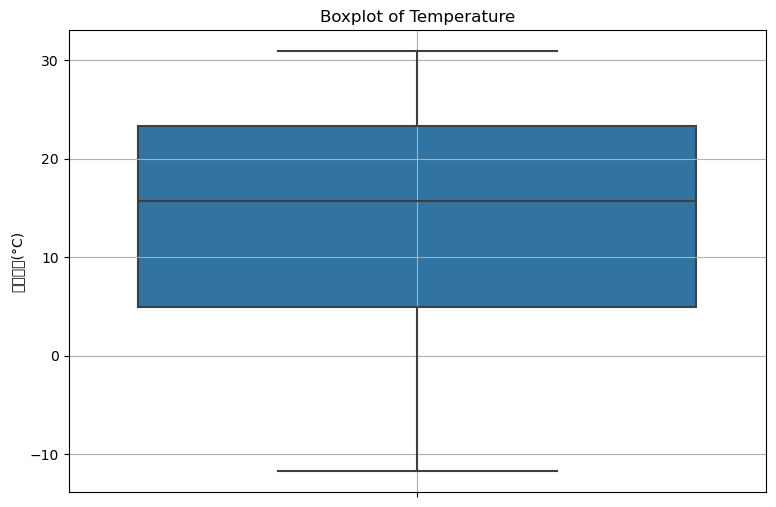

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


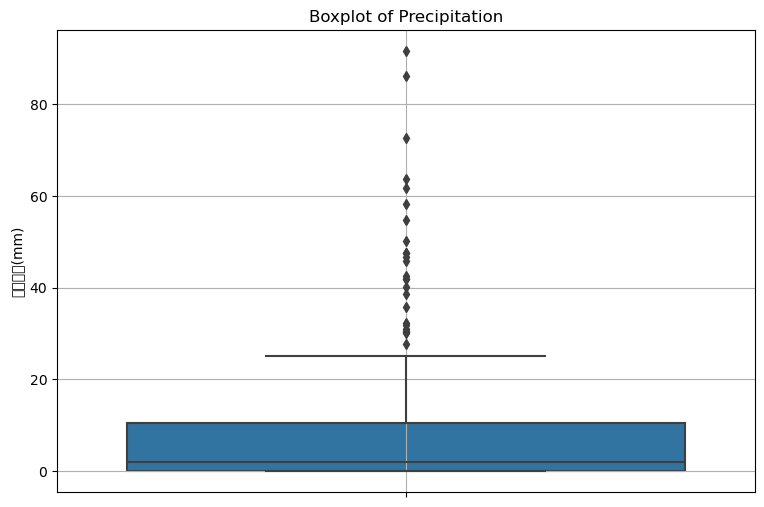

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


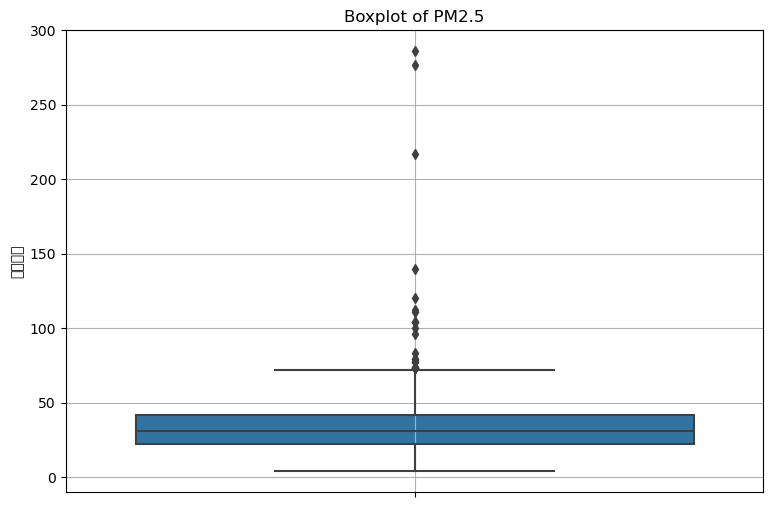

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


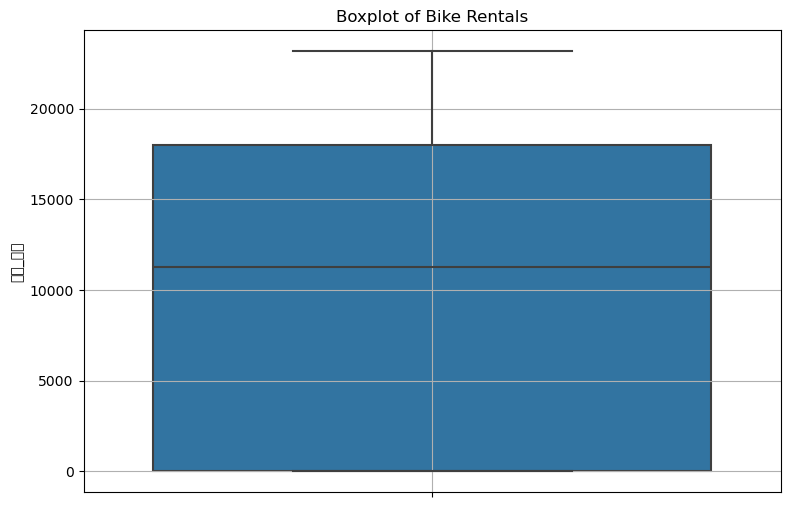

In [13]:
# 박스플롯 그리기 함수
def draw_boxplot(data, column, title):
    plt.figure(figsize=(9, 6))
    sns.boxplot(y=data[column])
    plt.title(title)
    plt.grid(True)
    plt.show()

# 기온 박스플롯
draw_boxplot(merged_data, '평균기온(°C)', 'Boxplot of Temperature')

# 강수량 박스플롯
draw_boxplot(merged_data, '일강수량(mm)', 'Boxplot of Precipitation')

# 미세먼지 박스플롯
draw_boxplot(merged_data, '미세먼지', 'Boxplot of PM2.5')

# 따릉이 대여량 박스플롯
draw_boxplot(merged_data, '전체_건수', 'Boxplot of Bike Rentals')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
rainfall = pd.read_csv('기온강수량미세먼지2.csv', encoding= 'cp949')  # 일별 강수량 데이터 포함
rentals = pd.read_csv('일별따릉이.csv')  # 일별 대여량 데이터 포함

# 날짜 형식 통일 및 데이터 병합
rainfall['기준_날짜'] = pd.to_datetime(rainfall['기준_날짜'])
rentals['기준_날짜'] = pd.to_datetime(rentals['기준_날짜'])
data = pd.merge(rainfall, rentals, on='기준_날짜', how='inner')

상관계수: 0.3100369581436954


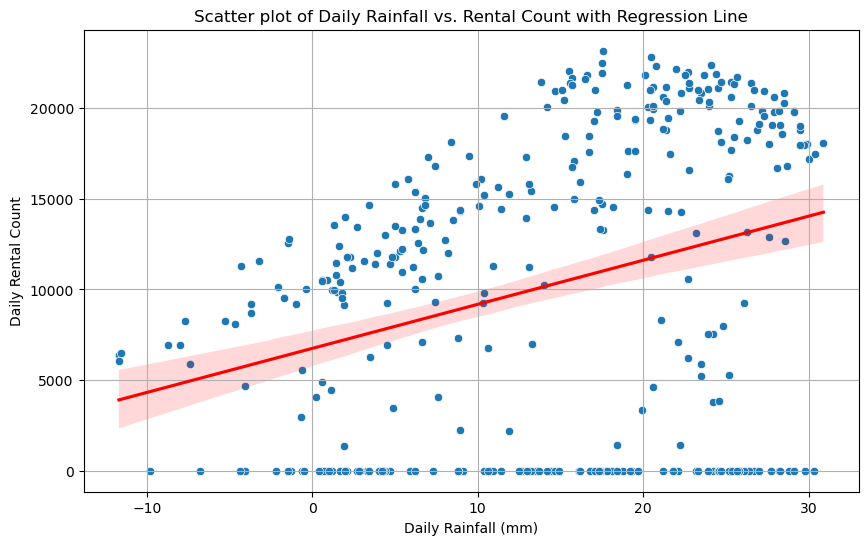

In [2]:
# 상관관계 계산
correlation = data['평균기온(°C)'].corr(data['전체_건수'])
print("상관계수:", correlation)

# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='평균기온(°C)', y='전체_건수', data=data)
sns.regplot(x='평균기온(°C)', y='전체_건수', data=data, scatter=False, color='red')
plt.title('Scatter plot of Daily Rainfall vs. Rental Count with Regression Line')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Daily Rental Count')
plt.grid(True)
plt.show()